In [1]:
import pandas as pd

In [3]:
agri_gdp_data = pd.read_csv('./agri_gdp_data.csv')
agri_gdp_data = agri_gdp_data.drop(columns='Unnamed: 0')


Train test split

In [4]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
agri_gdp_data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Code', 'gdp'],
      dtype='object')

In [6]:
agri_gdp_tr = agri_gdp_data.copy()
agri_gdp_tr.head()
agri_gdp_data = agri_gdp_tr.drop("total_emission", axis=1)
agri_gdp_labels = agri_gdp_tr["total_emission"].copy()

X_train, X_test, y_train, y_test = train_test_split(agri_gdp_data, agri_gdp_labels, test_size=0.2)

pipeline

In [7]:
imputer = SimpleImputer(strategy="most_frequent")
std_scaler = StandardScaler()

num_pipeline = Pipeline([
    ("imputer", imputer),
    ("std_scaler", std_scaler)
])
num_col = agri_gdp_data.select_dtypes(['number']).columns

# converting categorical data
cat_encoder = OneHotEncoder(handle_unknown="ignore")
cat_col = agri_gdp_data.select_dtypes(['object']).columns

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", cat_encoder, cat_col)
])

In [11]:
training_prepared = full_pipeline.fit_transform(X_train)
test_prepared = full_pipeline.transform(X_test) # do we put this through the pipeline i forget

regression & error

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_mse_rmse(predictions, labels):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

In [13]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(training_prepared, y_train)

lin_pred = lin_reg.predict(training_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_pred, y_train)
print("training mse: ", lin_mse)
print("training rmse: ", lin_rmse)

lin_test_pred = lin_reg.predict(test_prepared)

lin_mse, lin_rmse = calculate_mse_rmse(lin_test_pred, y_test)
print("test mse: ", lin_mse)
print("test rmse: ", lin_rmse)

training mse:  15.84991750258555
training rmse:  3.9811954866077035
test mse:  19.325675387344138
test rmse:  4.396097745426521


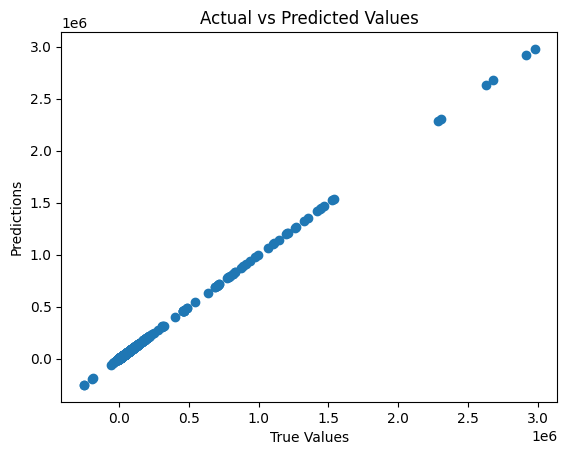

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted Values")
plt.show()

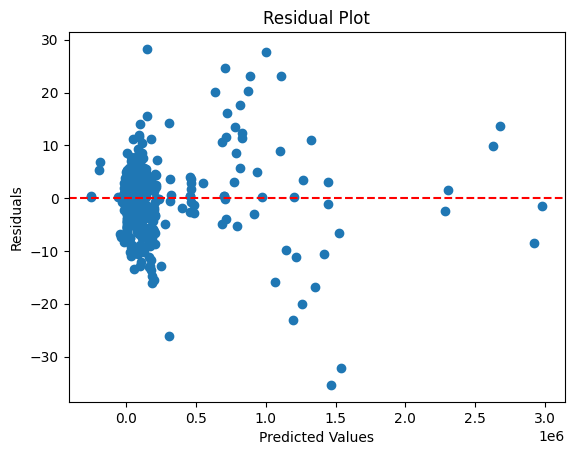

In [15]:
residuals = y_test - lin_test_pred

plt.scatter(lin_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

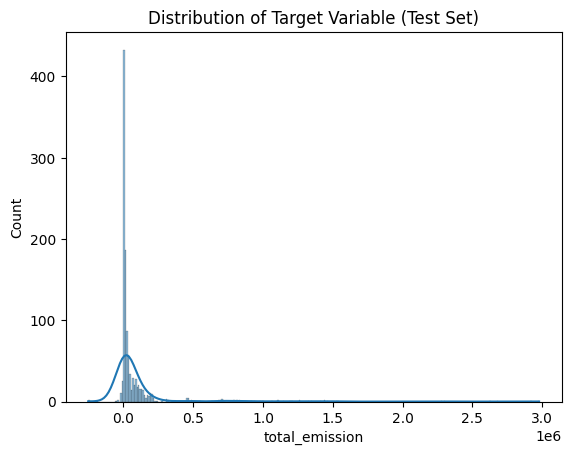

In [16]:
import seaborn as sns
sns.histplot(y_test, kde=True)
plt.title("Distribution of Target Variable (Test Set)")
plt.show()

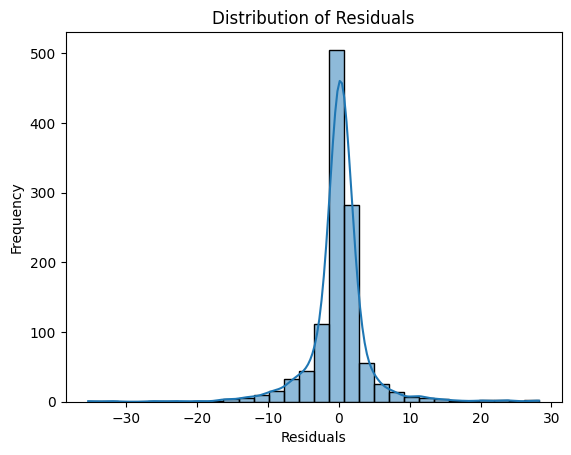

In [17]:
import seaborn as sns

sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

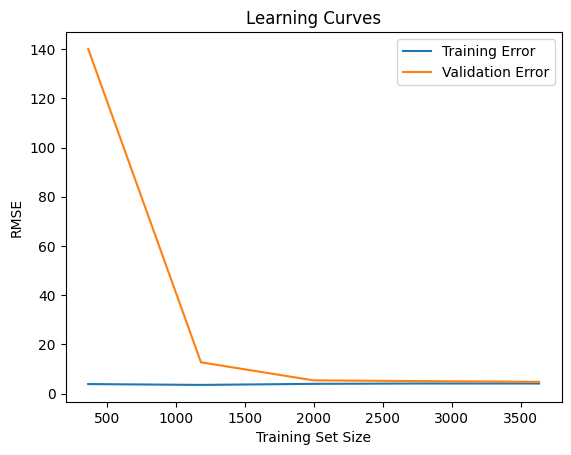

In [18]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    lin_reg, training_prepared, y_train, scoring="neg_mean_squared_error", cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label="Training Error")
plt.plot(train_sizes, test_rmse, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.show()

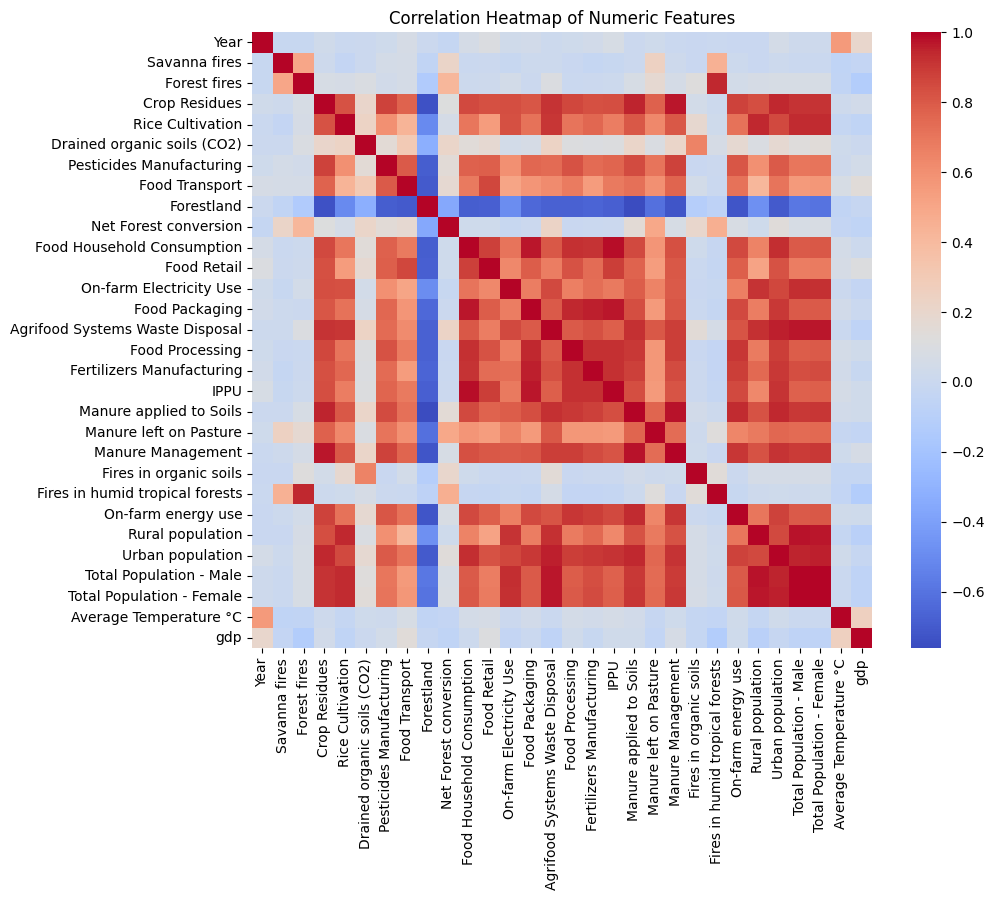

In [23]:
numeric_data = agri_gdp_data[num_col]  # Select only numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [26]:
print(agri_gdp_data.columns)


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'Average Temperature °C', 'Code', 'gdp'],
      dtype='object')


In [29]:
# Compute absolute differences between actual and predicted values
predicted_with_countries = pd.DataFrame({
    'Area': X_test['Area'].reset_index(drop=True),
    'Actual': y_test.reset_index(drop=True),
    'Predicted': lin_test_pred
})
predicted_with_countries['Difference'] = abs(predicted_with_countries['Actual'] - predicted_with_countries['Predicted'])

# Get the top 10 countries with the biggest differences
top_10_differences = predicted_with_countries.nlargest(10, 'Difference')

print("Top 10 Areas with the Largest Differences (Actual vs Predicted):")
print(top_10_differences)




Top 10 Areas with the Largest Differences (Actual vs Predicted):
           Area        Actual     Predicted  Difference
1113      China  1.466369e+06  1.466404e+06   35.374899
1035      China  1.538475e+06  1.538507e+06   32.102123
870    Pakistan  1.487517e+05  1.487234e+05   28.253740
850   Indonesia  9.987771e+05  9.987495e+05   27.583591
969       India  3.070319e+05  3.070580e+05   26.051007
1026  Indonesia  7.087788e+05  7.087542e+05   24.627077
601   Indonesia  8.891466e+05  8.891234e+05   23.169680
206       China  1.107741e+06  1.107718e+06   23.118392
87        China  1.195037e+06  1.195060e+06   23.061904
1073  Indonesia  8.708920e+05  8.708717e+05   20.344153


Top 3 correlated features: Index(['Urban population', 'Agrifood Systems Waste Disposal',
       'Food Household Consumption'],
      dtype='object')


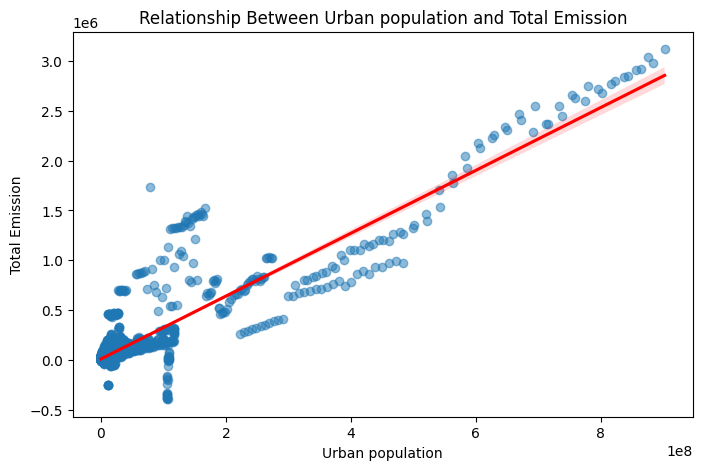

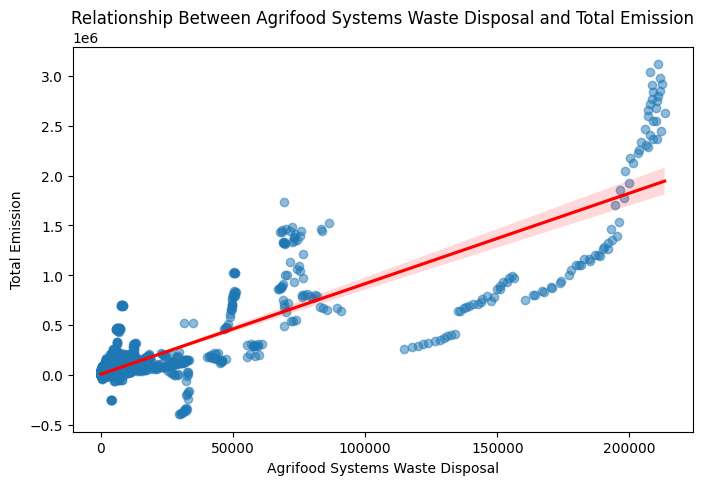

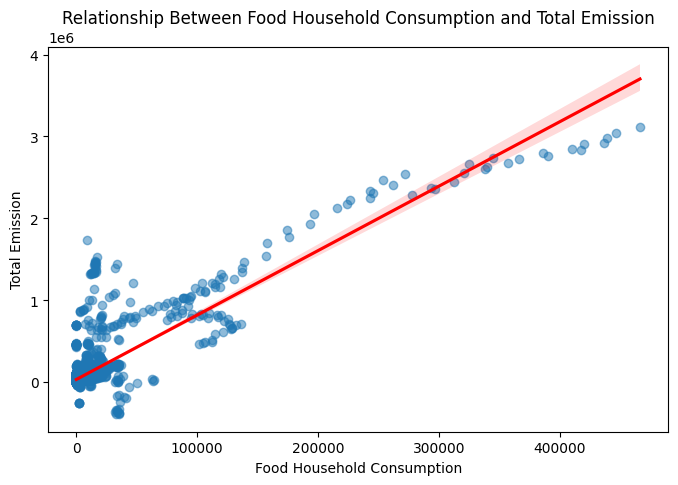

In [33]:
# Adding the target column back to the DataFrame
agri_gdp_tr['total_emission'] = agri_gdp_labels

numeric_data = agri_gdp_tr.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Get the top 3 features most correlated with total emission
top_features = correlation_matrix['total_emission'].abs().sort_values(ascending=False).index[1:4]  # Skip index 0, which is 'total_emission' itself
print("Top 3 correlated features:", top_features)

for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(data=agri_gdp_tr, x=feature, y='total_emission', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f"Relationship Between {feature} and Total Emission")
    plt.xlabel(feature)
    plt.ylabel("Total Emission")
    plt.show()


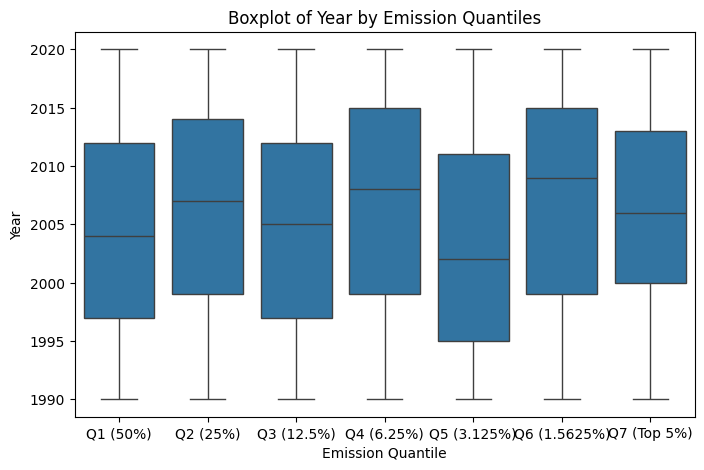

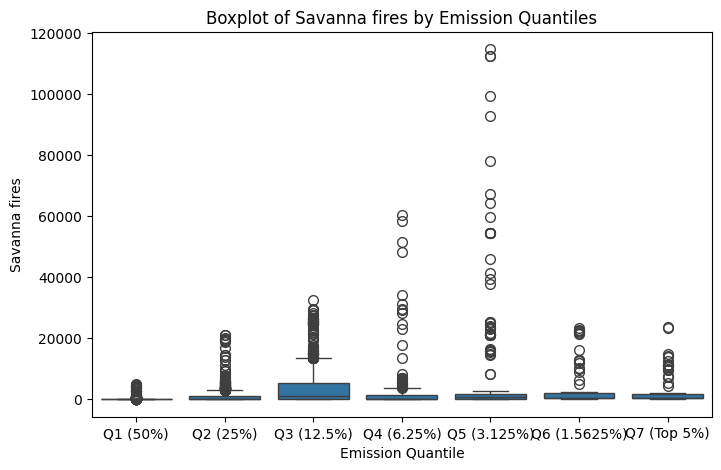

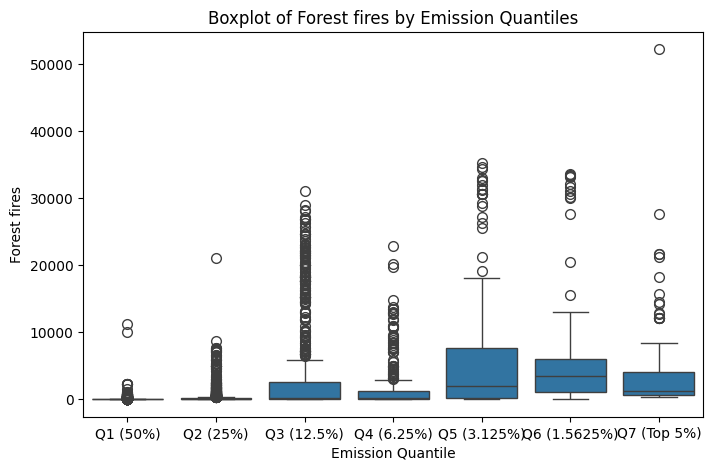

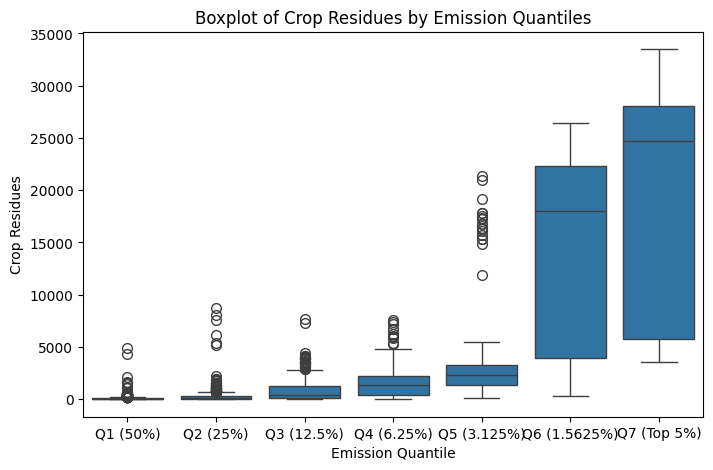

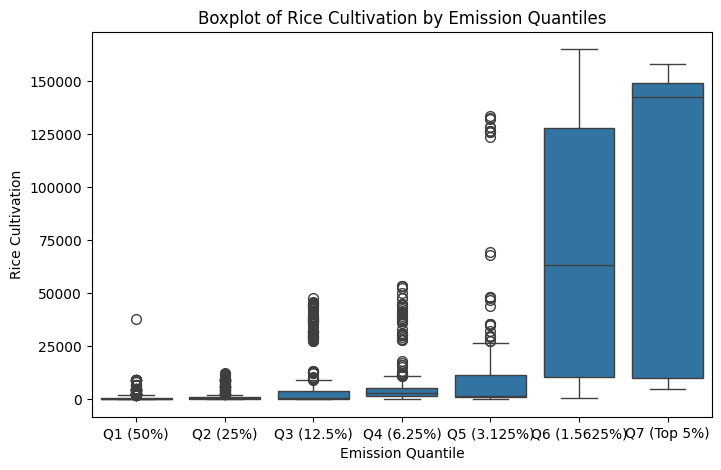

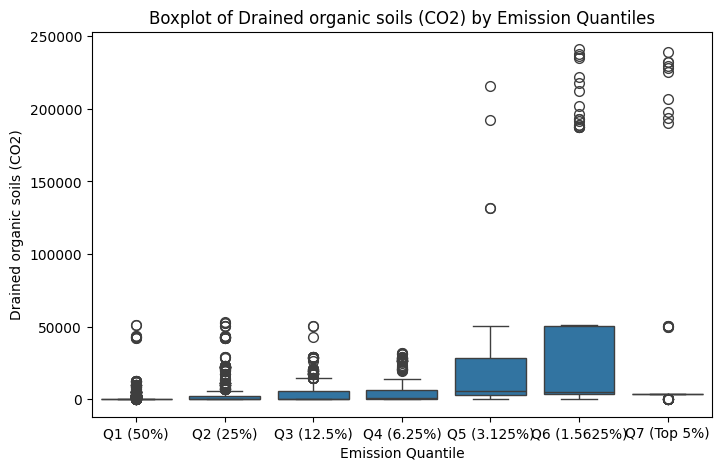

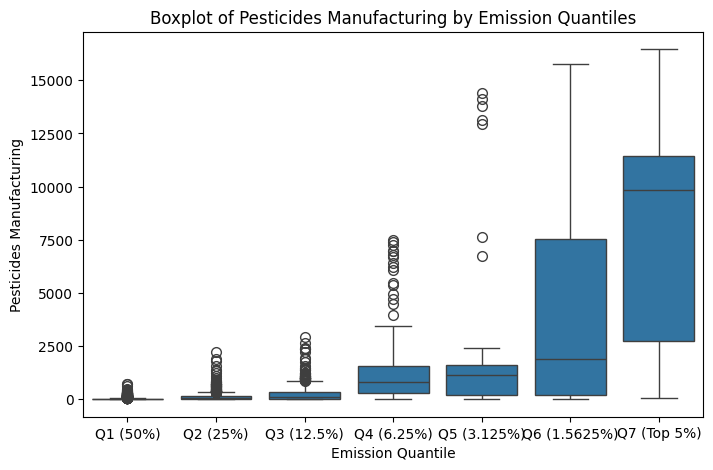

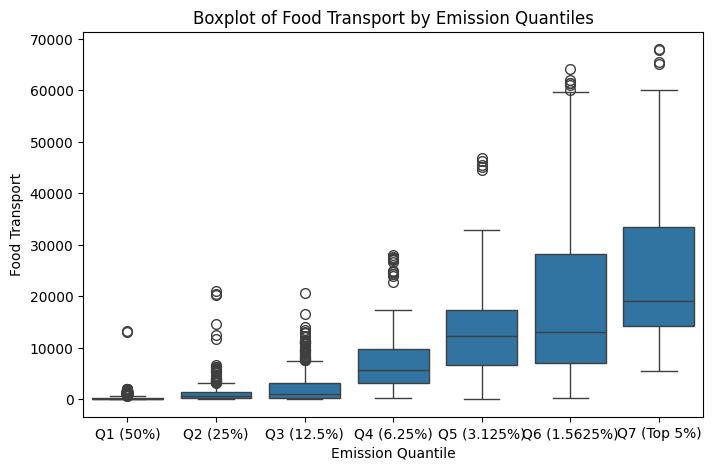

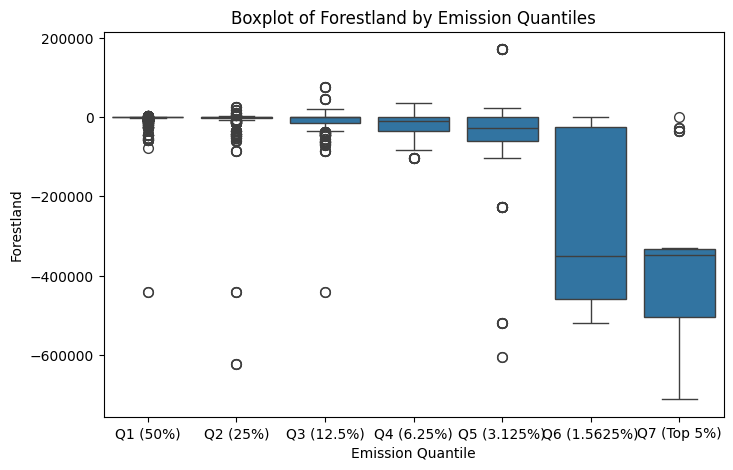

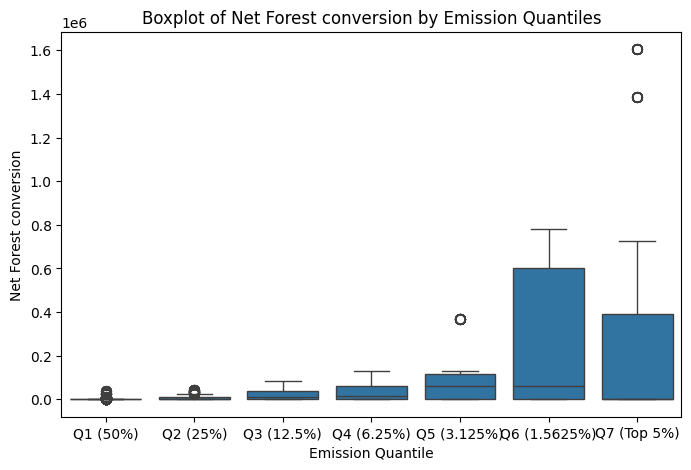

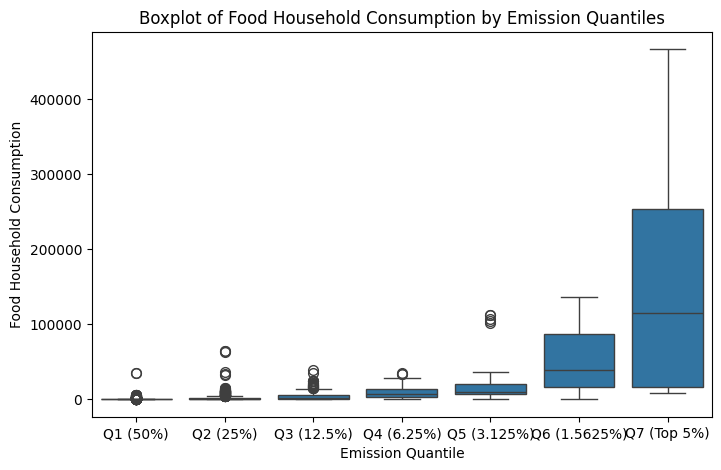

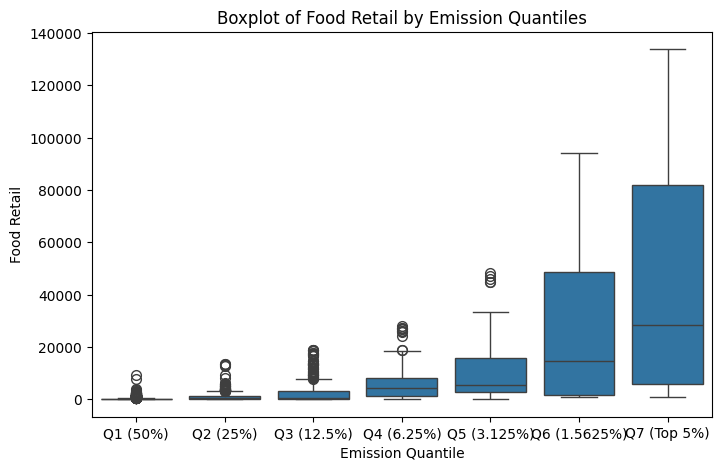

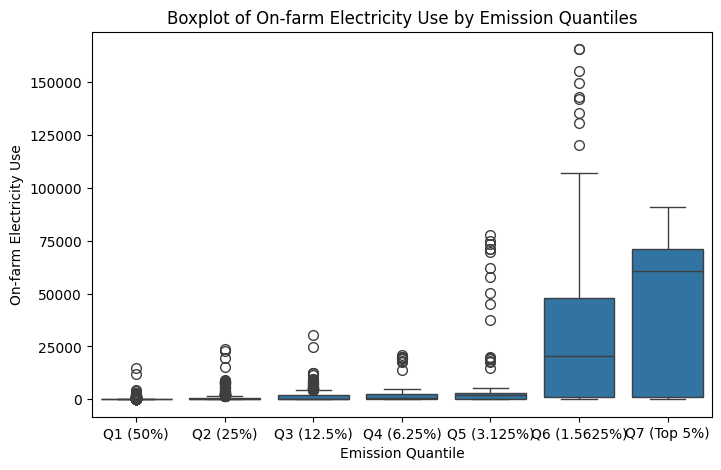

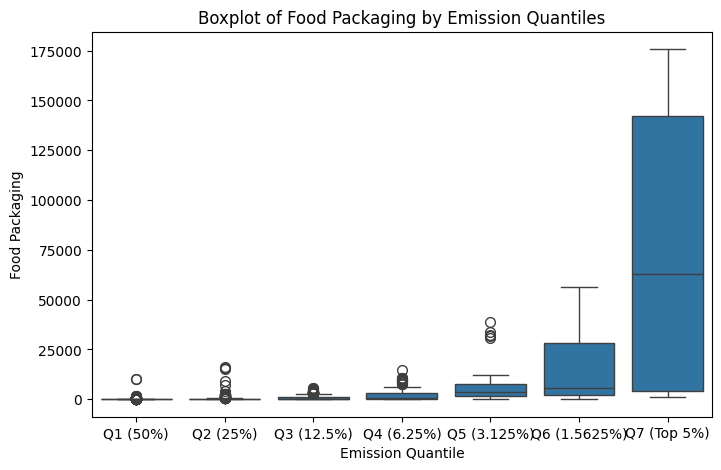

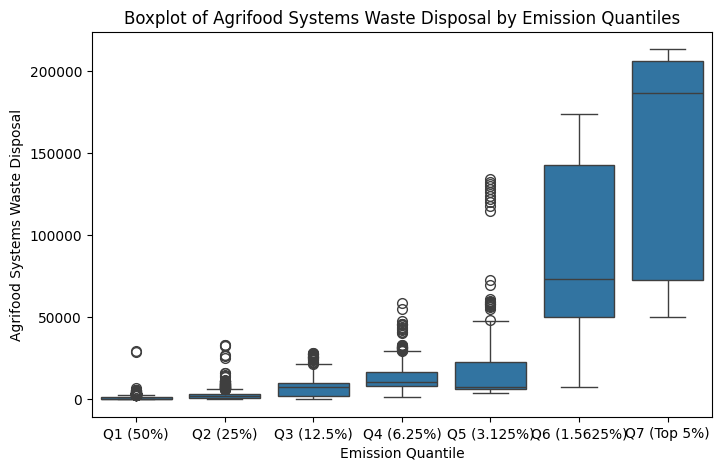

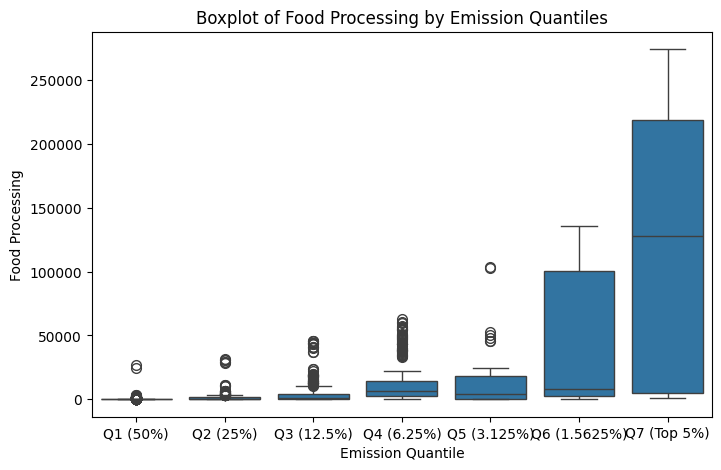

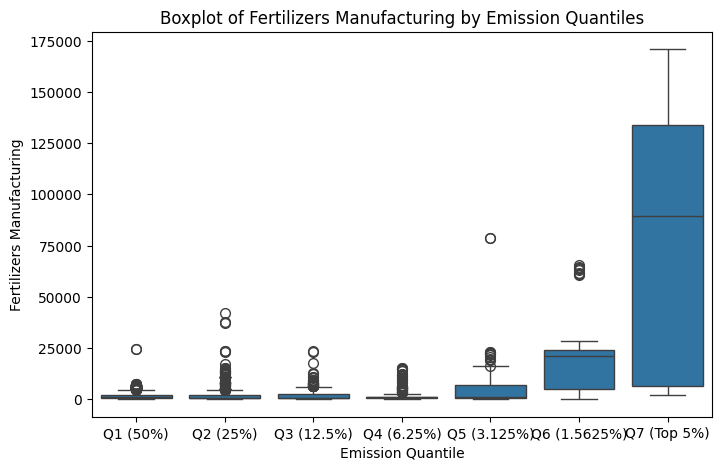

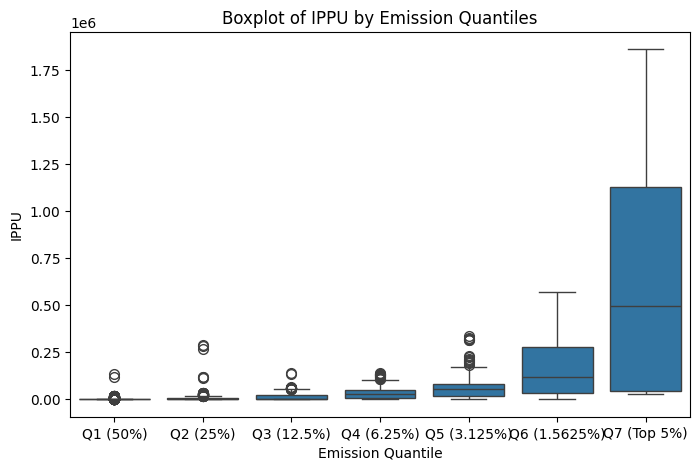

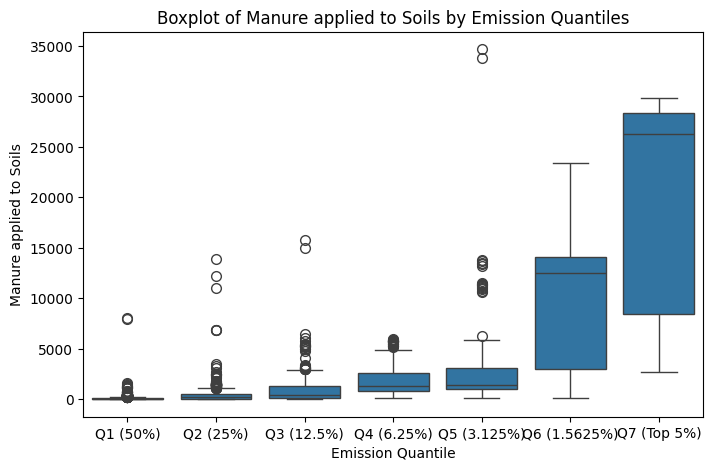

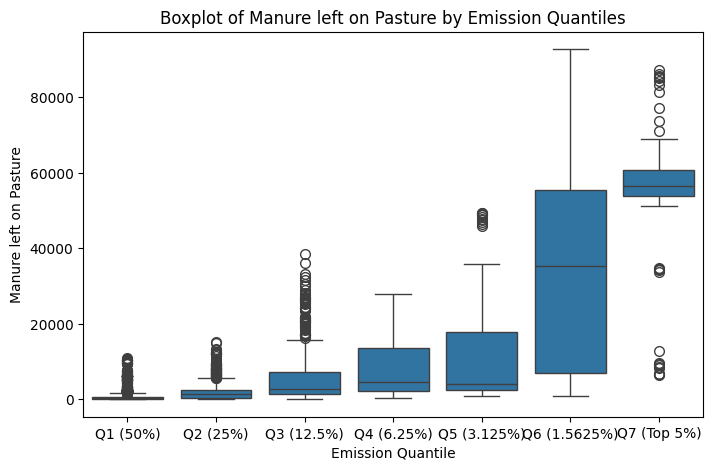

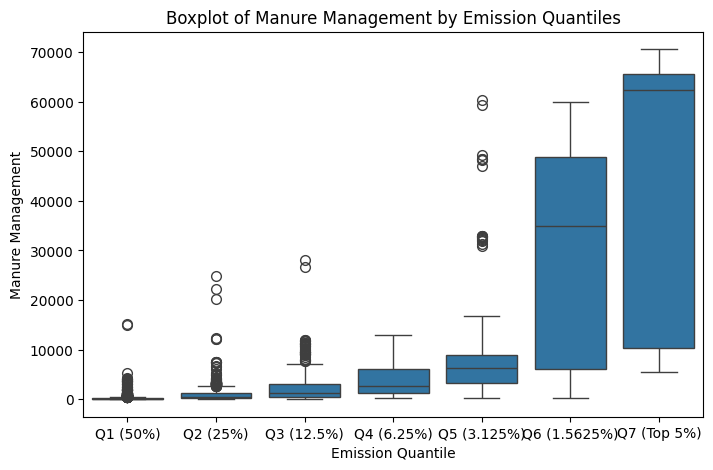

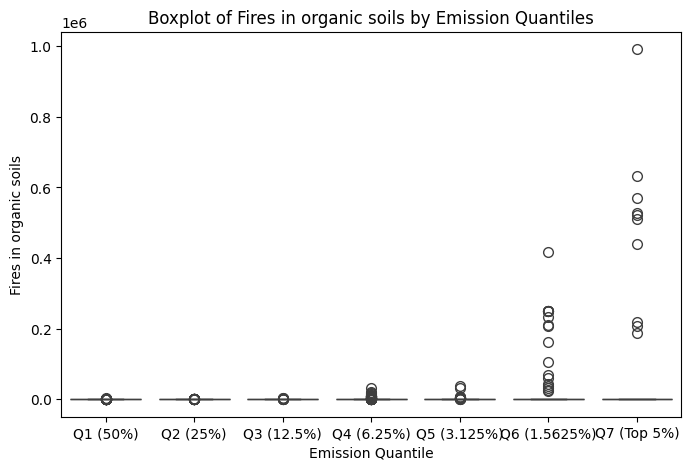

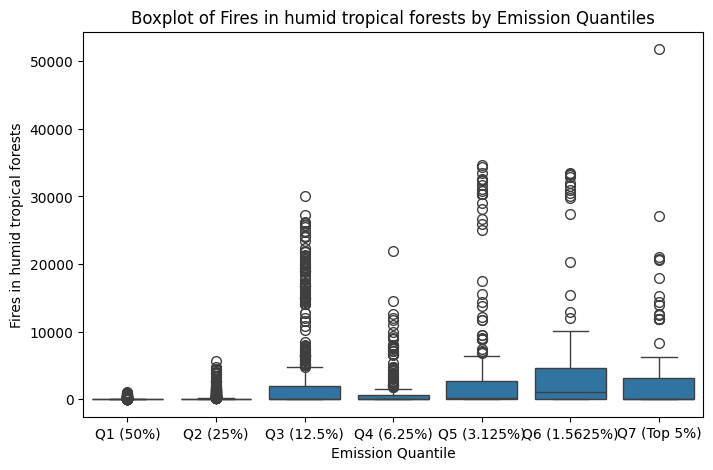

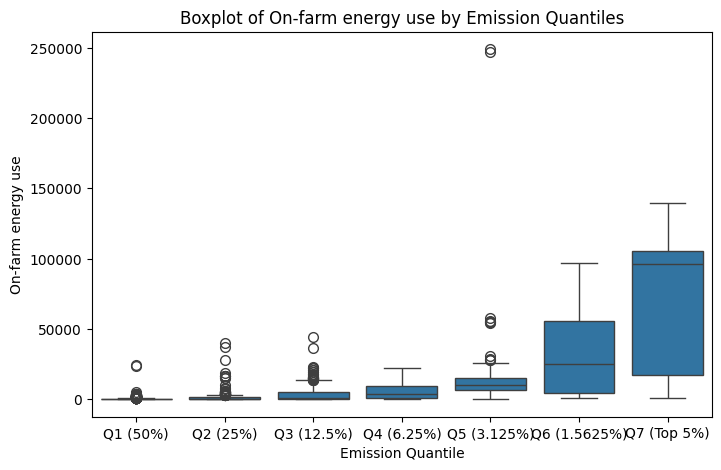

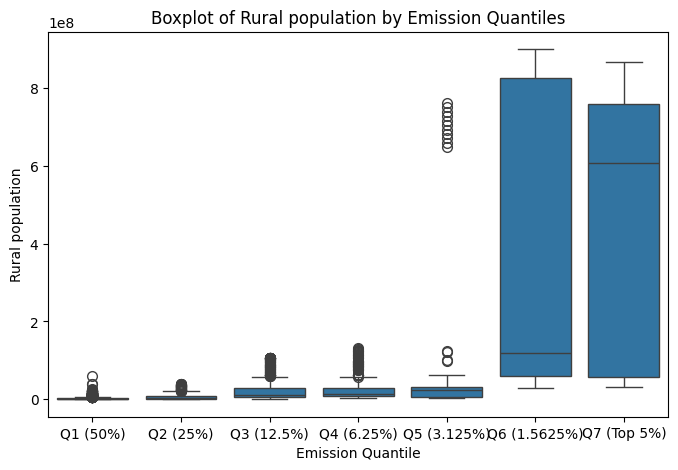

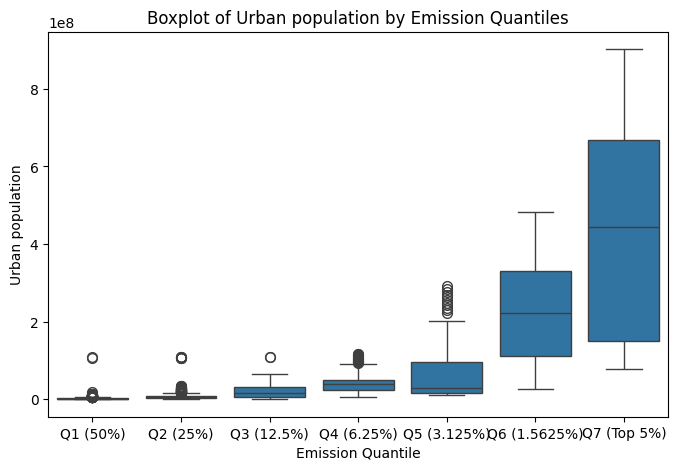

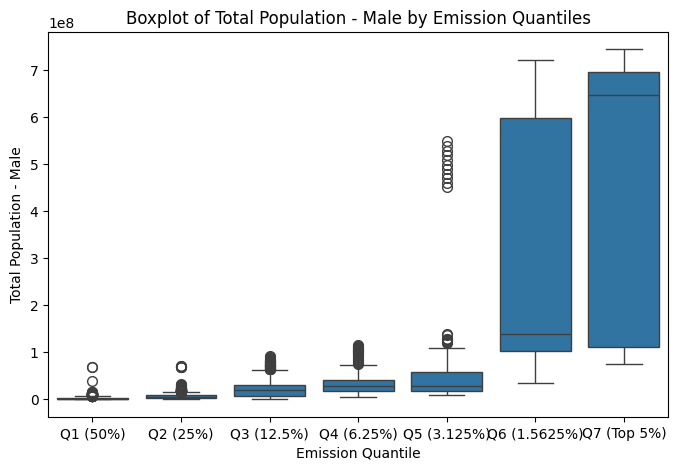

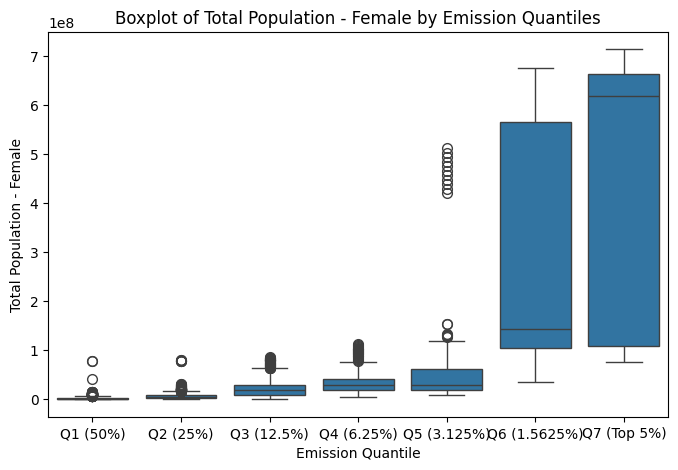

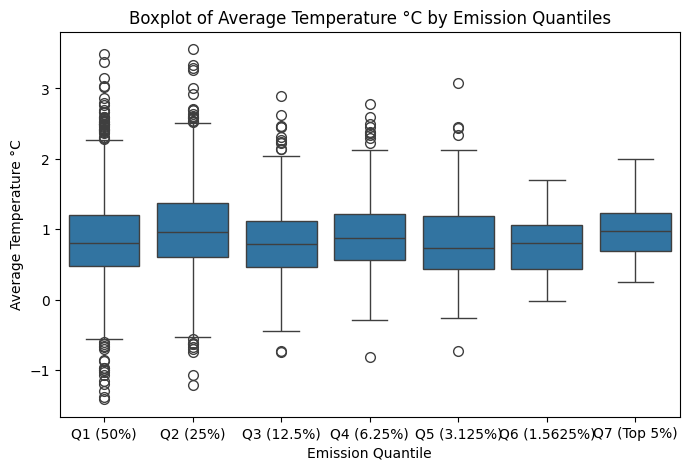

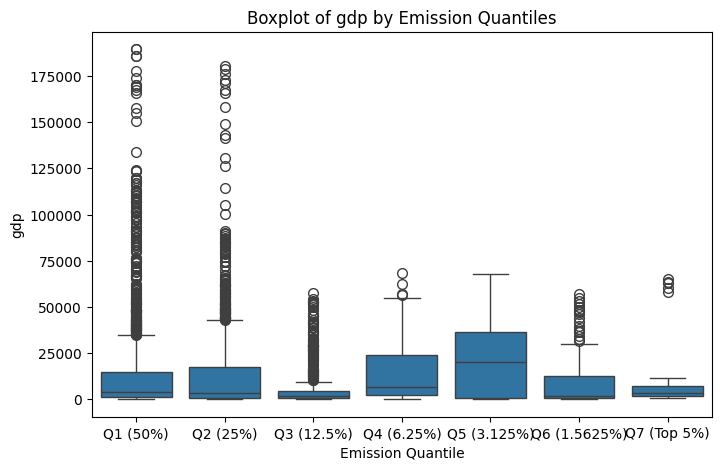

In [38]:
#These plots show the distribution of the column values for the differnt levels of total emission.
#Can be used to see which values have the largest range for differnet amount of emissions.
#Some of the graphs are heavily skewed due to outliers, but that is expected for vlaues such as Fires in Tropical Forests due to how specific it is.

quantiles = [0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 1]
labels = ['Q1 (50%)', 'Q2 (25%)', 'Q3 (12.5%)', 'Q4 (6.25%)', 'Q5 (3.125%)', 'Q6 (1.5625%)', 'Q7 (Top 5%)']
agri_gdp_tr['emission_quantile'] = pd.cut(agri_gdp_tr['total_emission'], bins=[0] + [agri_gdp_tr['total_emission'].quantile(q) for q in quantiles[1:]], labels=labels)

for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=agri_gdp_tr, x='emission_quantile', y=col, fliersize=7, whis=1.5)
    plt.title(f"Boxplot of {col} by Emission Quantiles")
    plt.xlabel("Emission Quantile")
    plt.ylabel(col)
    plt.show()
